In [1]:
## Question 2) Salary_hike -> Build a prediction model for Salary_hike


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

In [2]:
# Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
# Matplotlib creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
# Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
# The scipy. stats is the SciPy sub-package. It is mainly used for probabilistic distributions and statistical operations
# NumPy is a Python library used for working with arrays
# The chi2_contingency() function of scipy.stats module takes the contingency table element in 2d array format and it returns a tuple containing test statistics,p-value
# statsmodels.stats use for statistical test & tools import proportion package the tools calculate hypothesis test
# Mean squared error estimator measures the average of error squares , model evaluation measure for regression models and the lower value indicates a better fit.
# statsmodels. formula. api : A convenience interface for specifying models using formula strings and DataFrames.
#Plotly is an open-source, interactive visualization library for Python that produces highly-engaging, interactive graphs and charts
# Bokeh is a Python library for creating interactive visualizations for modern web browsers. It helps you build beautiful graphics, ranging from simple plots to complex dashboards with streaming datasets.
#bokeh. io. output_notebook function that gives us the ability to display Bokeh plots in output cells of Jupyter notebooks.
#ColumnDataSource when you pass sequences like Python lists or NumPy arrays to a Bokeh renderer, Bokeh automatically creates a ColumnDataSource with this data
#factor_cmap This creates a special color map that matches an individual color to each category
#Spectral6  palettes for general web design with RGB or design palettes


In [3]:
salary=pd.read_csv("Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary.info()
# Display or print a concise summary of a DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.describe()
# Display descriptive statistics summary of a given dataframe


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
#Loading the data
data = pd.read_csv("Salary_Data.csv")

#Assuming you have 10 predicted salary values
predicted_salary = [50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000]

#Extract the first 10 actual salary values from the data
actual_salary = data["Salary"][:10]

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_salary,predicted_salary))

print("RMSE:",rmse)




RMSE: 24087.208173634404


In [7]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary.shape

(30, 2)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

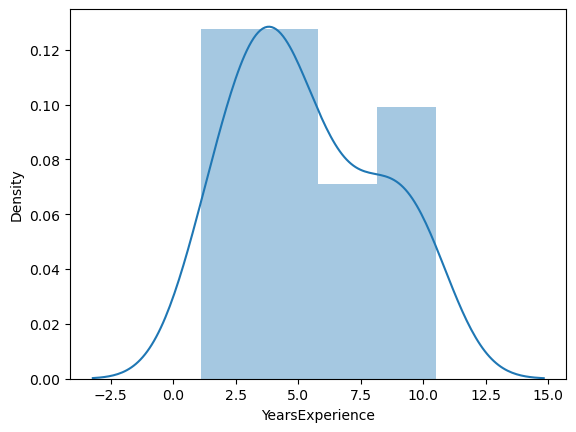

In [9]:
sns.distplot(salary['YearsExperience'])

In [10]:
#Distribution Shape: By observing the shape of the distribution plot, you can get an idea of the distribution's characteristics. If the plot resembles a bell curve (normal distribution), it indicates that the "YearsExperience" data is evenly distributed around the mean. If the distribution is skewed to one side, it suggests that the data is not symmetric.

#Central Tendency: The peak of the distribution, also known as the mode, represents the most common value for "YearsExperience." The point around which the data is centered gives an idea of the central tendency of this variable.

#Spread and Variability: The spread of the distribution provides insights into the variability of "YearsExperience" among the individuals in the dataset. A wider spread indicates a higher range of experience values.

#Outliers: Outliers, which are values that deviate significantly from the main cluster of data points, can sometimes be identified from the distribution plot. Outliers in "YearsExperience" might represent individuals with unusually high or low years of experience.

#Skewness: The plot can help you assess whether the data is skewed to the left (negatively skewed) or to the right (positively skewed). Skewness can provide insights into the overall trend of years of experience.


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

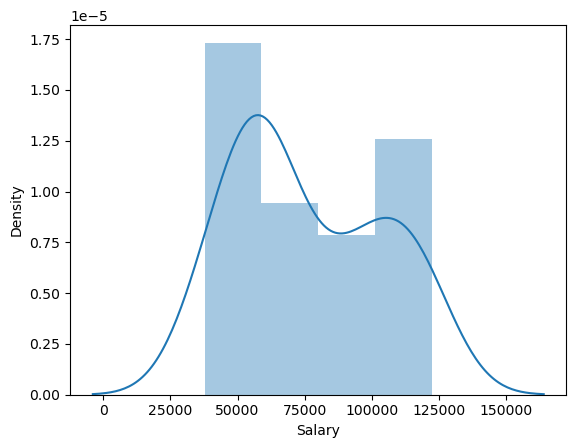

In [11]:
sns.distplot(salary['Salary'])


In [12]:
#Distribution Shape: The shape of the distribution plot for "Salary" gives you an idea of how salaries are distributed across the dataset. If the plot resembles a bell curve (normal distribution), it suggests that salaries are evenly distributed around the mean. Skewness in either direction indicates a departure from a symmetric distribution.

#Central Tendency: The peak of the distribution, also known as the mode, indicates the most common salary range. The central tendency of the salaries can help you understand where the majority of individuals fall in terms of compensation.

#Spread and Range: The spread of the distribution provides insights into the salary variability within the dataset. A wider spread suggests that there's a significant range of salary values.

#Outliers: Outliers, if present, are values that deviate significantly from the main cluster of salary data. Identifying outliers can help you understand whether there are individuals with exceptionally high or low salaries.

#Skewness: The direction of skewness (left or right) indicates whether salaries are skewed toward lower or higher values. Skewed data can provide insights into potential income disparities within the dataset.


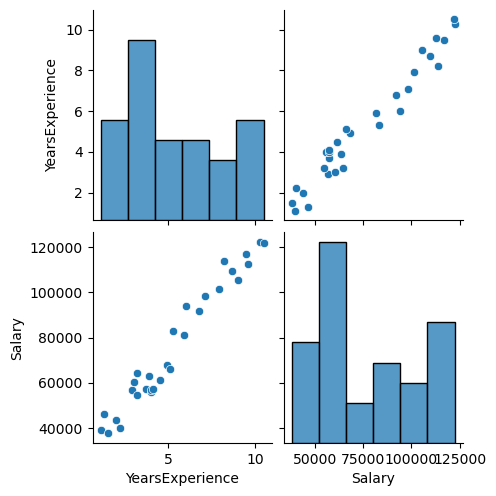

In [13]:
sns.pairplot(salary)


In [14]:
#Scatter Plots and Distributions: The diagonal of the pair plot contains histograms for each variable, showing the distribution of each variable individually. You can observe the distribution shape, skewness, and central tendency of "Salary" and "YearsExperience."

#Correlation: The scatter plots in the non-diagonal cells reveal the relationships between different pairs of variables. For "Salary" and "YearsExperience," you'll see a scatter plot with a clear positive linear relationship, indicating that as years of experience increase, salary tends to increase as well.

#Outliers: Outliers in the scatter plots might stand out as data points that deviate significantly from the general trend. For instance, there might be instances where individuals have relatively high salaries despite lower years of experience or vice versa.


In [15]:
salary.corr()          #Analysis of corelation


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [16]:
#Rename function
salary = salary.rename({'YearsExperience':'Experience'},axis=1)
salary

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='Experience', ylabel='Salary'>

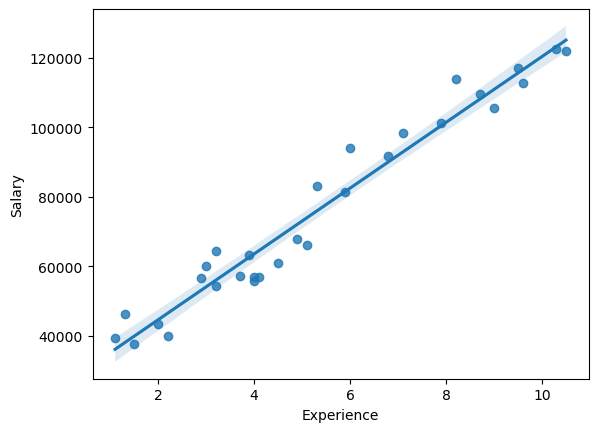

In [17]:
#regplot() method is used to plot data and draw a linear regression model fit.
sns.regplot(x=salary['Experience'],y=salary['Salary'])

In [18]:
#Positive Linear Relationship: The regression plot between "Experience" and "Salary" shows a positive linear relationship. As years of experience increase, salaries tend to increase as well. This observation supports the intuition that more experienced individuals typically earn higher salaries.

#Regression Line: The regression line on the scatter plot represents the best-fit linear model for the relationship between years of experience and salary. The slope of the line indicates the rate at which salary increases for each additional year of experience.

#Scatter around the Line: The scatter of data points around the regression line gives you an idea of how closely individual data points adhere to the linear trend. Points close to the line indicate a stronger linear correlation, while points farther away might indicate variability that the linear model doesn't capture.

#Outliers: Outliers, if present, are data points that deviate significantly from the main cluster of data. In this context, outliers might represent individuals who earn much higher or lower salaries given their years of experience.


## Model Building


In [19]:
# The smf.ols() function in Python is used to fit an ordinary least squares (OLS) model to a dataset. The OLS model is a linear regression model that minimizes the sum of the squared errors between the predicted values and the actual values.

model1 = smf.ols("Salary~Experience",data = salary).fit()

In [20]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n',model1.pvalues)
# The model1.params attribute in Python is used to access the parameters of a trained model.
# model1.tvalues : the tvalues attribute of the StatsResult object returned by the ttest() function can be used to access the t-statistics for the test. The t-statistic is a measure of the difference between the sample mean and the hypothesized population mean.
# model1.pvalues : pvalues measures the probability of obtaining a test statistic


Intercept     25792.200199
Experience     9449.962321
dtype: float64 

 Intercept     11.346940
Experience    24.950094
dtype: float64 

 Intercept     5.511950e-12
Experience    1.143068e-20
dtype: float64


In [21]:
# The model1.rsquared attribute in Python is used to access the R-squared value of a linear regression model. 
# model1.rsquared_adj The adjusted R-squared is a measure of the goodness of fit of a linear regression model.
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [22]:
# The summary() function in Python is used to get a summarized representation of an object.
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        02:36:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Prediction for Salary hike
newdata = pd.Series([7,15])
data_pred=pd.DataFrame(newdata,columns=['Experience'])
data_pred

,Experience
0,7
1,15


In [24]:
#Original Linear model
model1 = smf.ols("Salary ~ YearsExperience", data=data).fit()

#Calculate the RMSE for the original model
predicted_salary = model1.predict(data["YearsExperience"])
rmse_original=np.sqrt(mean_squared_error(data["Salary"],predicted_salary))
print("Original RMSE:",rmse_original)

#Explore more transformations
# for example,logarithmic transformation on YearsExperience
data["YearsExperience_log"] =np.log(data["YearsExperience"])
model_log = smf.ols("Salary ~ YearsExperience_log",data=data).fit()

#Calculate the predicted Salaries using the Log-tranformed model
predicted_salary_log = model_log.predict(data["YearsExperience_log"])

#Calculate the RMSE for the log-tranformed model
rmse_log = np.sqrt(mean_squared_error(data["Salary"],predicted_salary_log))
print("RMSE with Log Transformation:",rmse_log)

# Repeat the process for other transformations like square root, power, etc.
# ...

# Choose the transformation that results in the lowest RMSE



Original RMSE: 5592.043608760662
RMSE with Log Transformation: 10302.893706228302


In [25]:
model2 = smf.ols("Salary~np.log(Experience)",data = salary).fit()   #using log
# The smf.ols() function in Python is used to fit an ordinary least squares (OLS) model to a dataset. The OLS model is a linear regression model that minimizes the sum of the squared errors between the predicted values and the actual values.


In [26]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n',model2.pvalues)
# The model2.params attribute in Python is used to access the parameters of a trained model.
# model2.tvalues : the tvalues attribute of the StatsResult object returned by the ttest() function can be used to access the t-statistics for the test. The t-statistic is a measure of the difference between the sample mean and the hypothesized population mean.
# model2.pvalues : pvalues measures the probability of obtaining a test statistic


Intercept             14927.97177
np.log(Experience)    40581.98796
dtype: float64 

 Intercept              2.895135
np.log(Experience)    12.791989
dtype: float64 

 Intercept             7.268813e-03
np.log(Experience)    3.250155e-13
dtype: float64


In [27]:
#R squared values
# The model2.rsquared attribute in Python is used to access the R-squared value of a linear regression model. 
# model2.rsquared_adj The adjusted R-squared is a measure of the goodness of fit of a linear regression model.

(model2.rsquared,model2.rsquared_adj)

(0.853888882875697, 0.8486706286926862)

In [30]:
model2.summary()
# The summary() function in Python is used to get a summarized representation of an object.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           3.25e-13
Time:                        02:37:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Experience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Calculate the RMSE for the logarithmic model
predicted_salary_log = model2.predict(data["YearsExperience"])
rmse_log = np.sqrt(mean_squared_error(data["Salary"], predicted_salary_log))
print("RMSE with Log Transformation:", rmse_log)

# Explore more transformations
# For example, square root transformation on YearsExperience
data["YearsExperience_sqrt"] = np.sqrt(data["YearsExperience"])
model_sqrt = smf.ols("Salary ~ YearsExperience_sqrt", data=data).fit()

# Calculate the predicted salaries using the square root-transformed model
predicted_salary_sqrt = model_sqrt.predict(data["YearsExperience_sqrt"])

# Calculate the RMSE for the square root-transformed model
rmse_sqrt = np.sqrt(mean_squared_error(data["Salary"], predicted_salary_sqrt))
print("RMSE with Square Root Transformation:", rmse_sqrt)

# Repeat the process for other transformations like cube root, power, etc.
# ...

# Choose the transformation that results in the lowest RMSE


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Experience' is not defined
    Salary ~ np.log(Experience)
             ^^^^^^^^^^^^^^^^^^

In [32]:
model3 = smf.ols("Salary~np.square(Experience)",data = salary).fit()   #using square

In [33]:
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)    

Intercept                48042.585515
np.square(Experience)      776.318773
dtype: float64 

 Intercept                21.973654
np.square(Experience)    17.397015
dtype: float64 

 Intercept                3.389190e-19
np.square(Experience)    1.518127e-16
dtype: float64


In [34]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.9153198857852565, 0.9122955959918728)

In [35]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.52e-16
Time:                        02:39:43   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(Experience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Calculate the RMSE for the squared model
predicted_salary_squared = model3.predict(data["YearsExperience"])
rmse_squared = np.sqrt(mean_squared_error(data["Salary"], predicted_salary_squared))
print("RMSE with Square Transformation:", rmse_squared)

# Explore more transformations
# For example, cube root transformation on YearsExperience
data["YearsExperience_cbrt"] = np.cbrt(data["YearsExperience"])
model_cbrt = smf.ols("Salary ~ YearsExperience_cbrt", data=data).fit()

# Calculate the predicted salaries using the cube root-transformed model
predicted_salary_cbrt = model_cbrt.predict(data["YearsExperience_cbrt"])

# Calculate the RMSE for the cube root-transformed model
rmse_cbrt = np.sqrt(mean_squared_error(data["Salary"], predicted_salary_cbrt))
print("RMSE with Cube Root Transformation:", rmse_cbrt)

# Repeat the process for other transformations like logarithm, power, etc.
# ...

# Choose the transformation that results in the lowest RMSE


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Experience' is not defined
    Salary~np.square(Experience)
           ^^^^^^^^^^^^^^^^^^^^^

In [37]:
model4 = smf.ols("Salary~np.sqrt(Experience)",data = salary).fit()   #using square

In [38]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)

Intercept             -16055.769117
np.sqrt(Experience)    41500.680583
dtype: float64 

 Intercept              -3.262308
np.sqrt(Experience)    19.437148
dtype: float64 

 Intercept              2.906965e-03
np.sqrt(Experience)    8.565358e-18
dtype: float64


In [39]:
#R squared values
(model4.rsquared,model4.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

In [40]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           8.57e-18
Time:                        03:01:24   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(Experience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Calculate the RMSE for the square root model
predicted_salary_sqrt = model4.predict(data["YearsExperience"])
rmse_sqrt = np.sqrt(mean_squared_error(data["Salary"], predicted_salary_sqrt))
print("RMSE with Square Root Transformation:", rmse_sqrt)

# Explore more transformations
# For example, inverse transformation on YearsExperience
data["YearsExperience_inv"] = 1 / data["YearsExperience"]
model_inv = smf.ols("Salary ~ YearsExperience_inv", data=data).fit()

# Calculate the predicted salaries using the inverse-transformed model
predicted_salary_inv = model_inv.predict(data["YearsExperience_inv"])

# Calculate the RMSE for the inverse-transformed model
rmse_inv = np.sqrt(mean_squared_error(data["Salary"], predicted_salary_inv))
print("RMSE with Inverse Transformation:", rmse_inv)

# Repeat the process for other transformations like cube root, power, etc.
# ...

# Choose the transformation that results in the lowest RMSE


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Experience' is not defined
    Salary~np.sqrt(Experience)
           ^^^^^^^^^^^^^^^^^^^

In [42]:
# Prepare transformations and RMSE values
transformations = ['Original', 'Logarithmic', 'Square Root', 'Inverse']
rmse_values = [rmse_original, rmse_log, rmse_sqrt, rmse_inv]

# Create a DataFrame for visualization
results_df = pd.DataFrame({'Transformation': transformations, 'RMSE': rmse_values})

# Plot using Plotly Express
fig = px.bar(results_df, x='Transformation', y='RMSE', title='RMSE for Different Transformations')
fig.show()

NameError: name 'rmse_sqrt' is not defined